# Decision Tree Regression

In [1]:
# Core
import pandas as pd
import numpy as np
import warnings
from IPython.display import *
import matplotlib.pyplot as plt

In [2]:
# Evitamos la notación científica y rendondeamos los valores a 2 dígitos después de la coma
pd.options.display.float_format = '{:.2f}'.format

# Evitamos los molestos warnings
warnings.simplefilter("ignore")

In [3]:
# Cargamos nuestro dataset
data = pd.read_csv('https://raw.githubusercontent.com/jorge-robledo11/Datasets/main/Datasets/boston/Boston.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222,18.70,396.90,5.33,36.20


In [4]:
# Dimensionamos
display(data.shape)

(506, 14)

In [5]:
# Tipos de variables
display(data.dtypes)

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [6]:
# Datos faltantes
display(data.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [7]:
# Cantidades para cada feature
display(data['chas'].value_counts().sort_values(ascending=False))
display(data['rad'].value_counts().sort_values(ascending=False))

0    471
1     35
Name: chas, dtype: int64

24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: rad, dtype: int64

In [8]:
# Features y target
X = data.drop(['medv'], axis=1)
y = data[['medv']]

display(X.shape, y.shape)

(506, 13)

(506, 1)

In [9]:
# Importamos nuestro regresor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [10]:
# Obtenemos nuestros datos de entrenamiento y test por medio de K-Fold
kf = KFold(n_splits=10, shuffle=True, random_state=0)

for train, test in kf.split(X,y):

    X_train = X.iloc[train]
    y_train = y.iloc[train]
    X_test = X.iloc[test]
    y_test = y.iloc[test]

In [11]:
# Instanciamos y entrenamos
reg_tree = DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=10, random_state=0)
reg_tree.fit(X_train,y_train)

DecisionTreeRegressor(min_samples_leaf=10, min_samples_split=30, random_state=0)

In [12]:
# Hallamos las predicciones
y_pred = reg_tree.predict(X_train)
y_pred = pd.DataFrame(y_pred, columns=['Predicciones DTR'])

In [13]:
# Predicciones del Decision Tree Regression
predicciones = y_train.join(y_pred)
predicciones.sample(10)

,medv,Predicciones DTR
1,21.60,25.89
453,17.80,31.58
153,19.40,44.93
434,11.70,27.00
496,19.70,NaN
368,50.00,20.47
151,19.60,44.93
119,19.30,20.47
232,41.70,44.93
418,8.80,17.03


In [14]:
# Promedio del MSE con Cross Validation en valor absoluto
score = cross_val_score(reg_tree, X_train, y_train, scoring='neg_mean_squared_error', cv=kf, n_jobs=-1)
score = round(abs(score.mean()),2)
display(f'MSE: {score}')

'MSE: 21.24'

In [15]:
# Accuracy Score
acc = reg_tree.score(X_test, y_test)
acc = round(acc,2)
display(f'Accuracy Score: {acc*100}%')

'Accuracy Score: 81.0%'

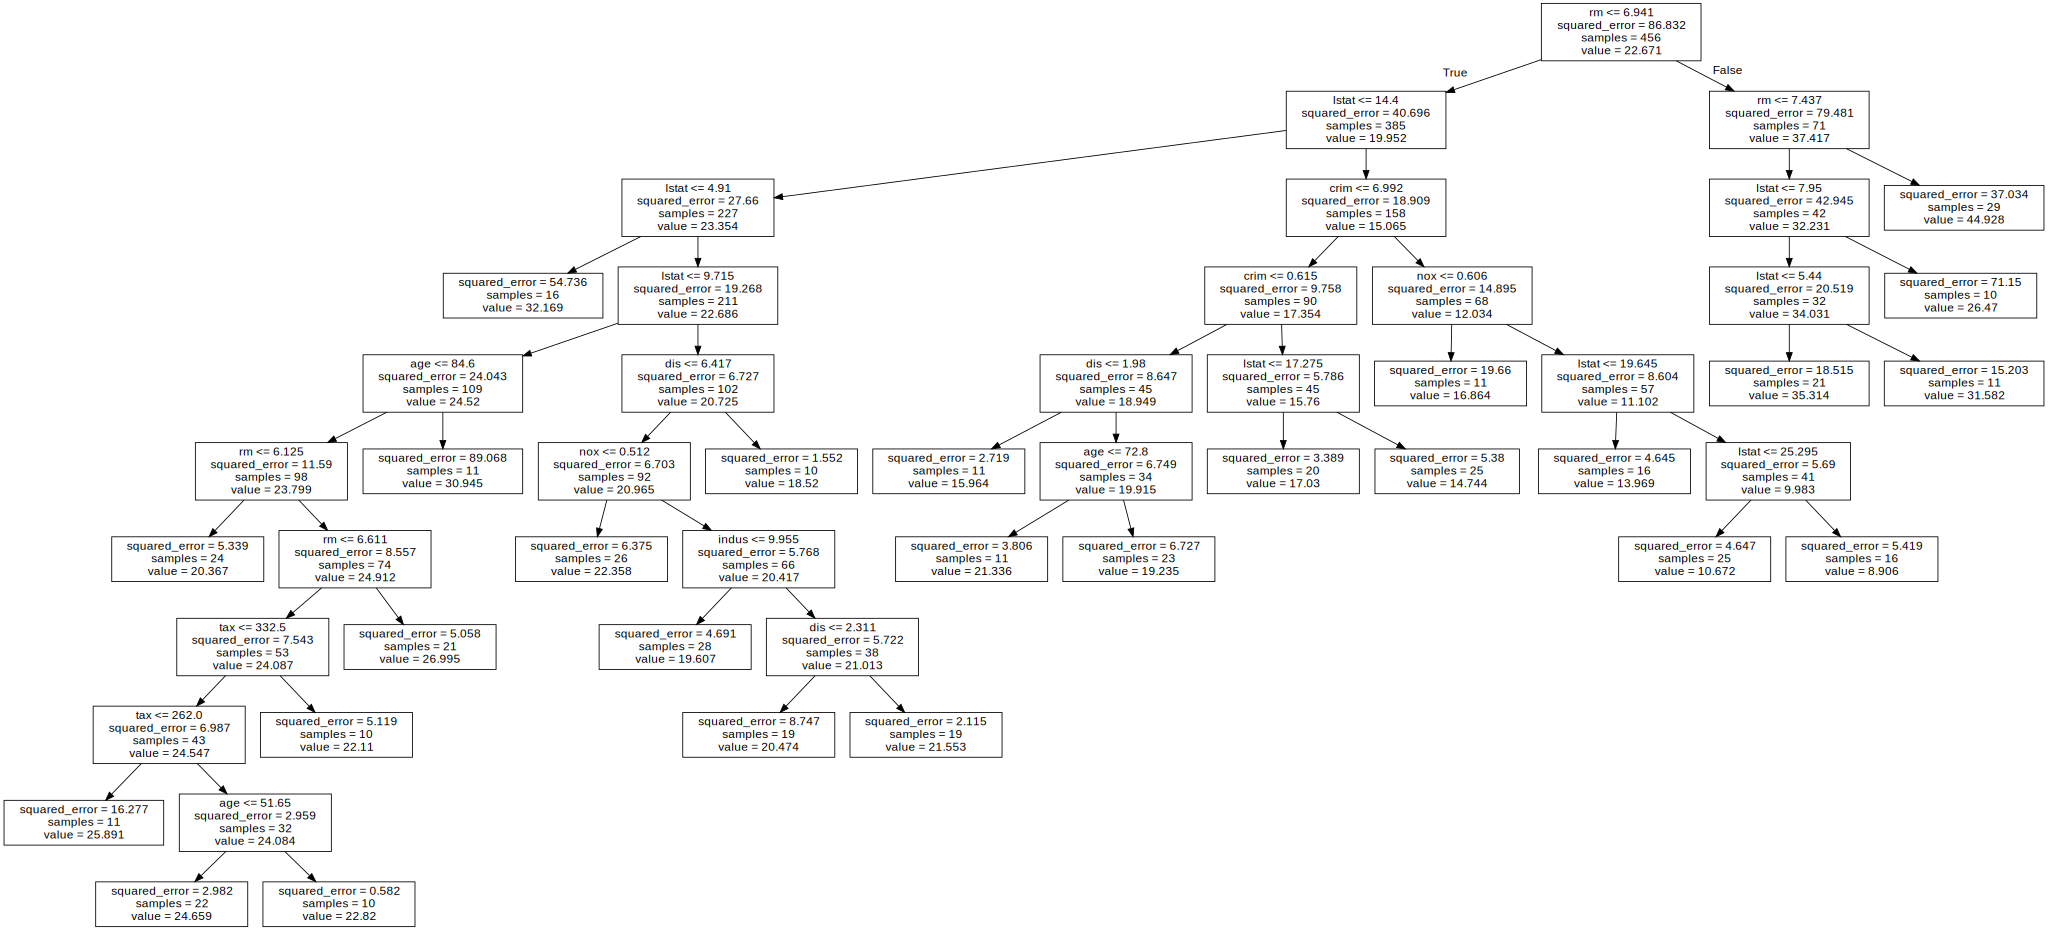

In [16]:
# Visualizamos el árbol
from sklearn.tree import export_graphviz
import os
from graphviz import Source

with open("/work/Machine Learning Data Science en Python/Algoritmos de Machine Learning/Decision Tree & Random Forest/boston_rtree.dot", "w") as dotfile:
    export_graphviz(reg_tree, out_file=dotfile, feature_names=list(X_train))
    dotfile.close()    

file = open("/work/Machine Learning Data Science en Python/Algoritmos de Machine Learning/Decision Tree & Random Forest/boston_rtree.dot", "r")
text = file.read()
Source(text)

In [17]:
# Importancia de cada feature
dict(zip(X,reg_tree.feature_importances_))

{'crim': 0.039655514870429336,
 'zn': 0.0,
 'indus': 0.000953580932599618,
 'chas': 0.0,
 'nox': 0.01126207931757679,
 'rm': 0.6448429538074878,
 'age': 0.01679230551890108,
 'dis': 0.0058266450174224195,
 'rad': 0.0,
 'tax': 0.0022405184946531543,
 'ptratio': 0.0,
 'black': 0.0,
 'lstat': 0.2784264020409299}

# Random Forest Regressor

In [18]:
# Importamos nuestro estimador de ensamble
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [19]:
# Instanciamos y entrenamos
forest = RandomForestRegressor(n_jobs=-1, oob_score=True, n_estimators=1000, max_depth=50)
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=50, n_estimators=1000, n_jobs=-1,
                      oob_score=True)

In [20]:
# Creamos nuestra predicción con nuestro modelo de ensamble
y_pred2 = pd.DataFrame(forest.oob_prediction_, columns=['Predicciones RFR'])

In [21]:
# Juntamos ambas predicciones para comparar los resultados
predicciones_final = predicciones.merge(y_pred2, left_index=True, right_index=True)
predicciones_final.sample(10)

,medv,Predicciones DTR,Predicciones RFR
360,25.00,10.67,13.60
409,27.50,17.03,16.33
378,13.10,8.91,7.42
289,24.80,19.61,21.35
444,10.80,19.61,20.61
379,10.20,10.67,8.20
418,8.80,17.03,18.33
144,11.80,17.03,16.38
12,21.70,20.37,20.10
248,24.50,44.93,43.68


In [22]:
# MSE
display(f'MSE: {round(metrics.mean_squared_error(y_train, y_pred2),2)}')

'MSE: 11.2'

In [23]:
# Accuracy Score
forest_score = round(forest.oob_score_,2)
display(f'Accuracy Score: {forest_score*100}%')

'Accuracy Score: 87.0%'

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4ec84517-f553-446b-9032-1da3132bd62a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>